# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
%matplotlib inline

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date', 
    parse_dates=['Date'], 
    infer_datetime_format=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)

print(df_mercado_trends.columns)

C:\Users\pyro5\AppData\Local\Temp\ipykernel_14940\2546616170.py:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_trends = pd.read_csv(
C:\Users\pyro5\AppData\Local\Temp\ipykernel_14940\2546616170.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


Index(['Search Trends'], dtype='object')


In [4]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


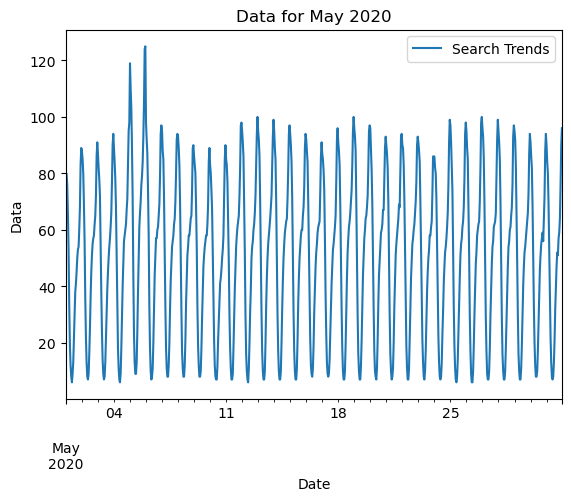

In [5]:
# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc['2020-05']
# Plot to visualize the data for May 2020
import matplotlib.pyplot as plt

df_may_2020.plot()

# Add labels and title to the plot
plt.xlabel('Date')
plt.ylabel('Data')
plt.title('Data for May 2020')

# Show the plot
plt.show()

#### Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [8]:
# Calculate the sum of the total search traffic for May 2020
total_search_traffic_may_2020 = df_may_2020['Search Trends'].sum()
total_search_traffic_may_2020
# View the traffic_may_2020 value


38181

In [6]:
# Calcluate the monhtly median search traffic across all months 
monthly_median_search_traffic = df_mercado_trends.groupby(df_mercado_trends.index.month)['Search Trends'].median()
monthly_median_search_traffic
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_sum_median_search_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month])['Search Trends'].agg(['sum', 'median'])

# View the median_monthly_traffic value
print("Monthly sum and median search traffic:")
print(monthly_sum_median_search_traffic)

Monthly sum and median search traffic:
             sum  median
Date Date               
2016 6     33196    50.0
     7     33898    48.5
     8     34459    50.0
     9     32376    47.0
     10    32334    45.0
     11    33793    51.0
     12    33789    48.0
2017 1     32984    47.0
     2     31901    51.0
     3     35363    51.0
     4     32522    47.0
     5     33216    47.0
     6     34211    50.5
     7     34988    49.0
     8     36113    51.0
     9     33693    49.0
     10    32842    44.0
     11    35144    51.0
     12    35420    50.0
2018 1     37347    54.0
     2     33748    53.0
     3     36051    51.0
     4     35283    52.0
     5     35309    49.0
     6     34115    49.0
     7     35927    51.5
     8     37012    54.0
     9     34037    51.0
     10    35879    52.0
     11    34686    50.0
     12    35245    51.0
2019 1     38505    57.0
     2     34129    56.0
     3     37331    54.0
     4     35505    54.0
     5     34983    50.0
     6     

In [9]:
# To compare the seach traffic for the month of May 2020 to the overall monthly median value,
# Divide the may traffic total by the median monthly traffic

monthly_median_search_traffic
total_search_traffic_may_2020

total_search_traffic_may_2020/monthly_median_search_traffic

Date
1     720.396226
2     720.396226
3     734.250000
4     748.647059
5     763.620000
6     748.647059
7     748.647059
8     748.647059
9     763.620000
10    795.437500
11    734.250000
12    763.620000
Name: Search Trends, dtype: float64

##### Answer the following question: 

**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** 

In [ ]:
#Yes, there does seem to be a spike in the search traffic for that month.

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

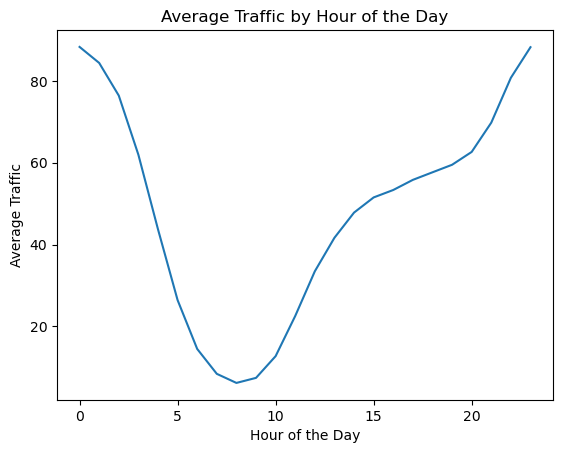

In [63]:
# Convert 'timestamp' column to datetime format
##df_mercado_trends['Date'] = pd.to_datetime(df_mercado_trends['Date'])

# Extract the hour from the 'timestamp' column
#df_mercado_trends['hour'] = df_mercado_trends['Date'].dt.hour

# Group by the hour of the day and calculate average traffic
average_traffic = df_mercado_trends.groupby(df_mercado_trends.index.hour)['Search Trends'].mean()
average_traffic
# Plot the average traffic by the hour of the day
average_traffic.plot(kind='line')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Hour of the Day')
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

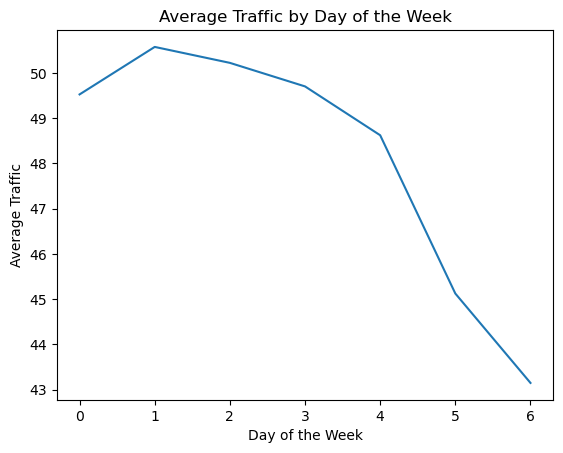

In [64]:
# Group the hourly search data to plot the average traffic by the day of week 
# Convert 'timestamp' column to datetime format
# Convert 'Date' column to datetime format
df_mercado_trends['Date'] = df_mercado_trends.index
# Extract the day of the week from the 'Date' column
df_mercado_trends['day_of_week'] = df_mercado_trends['Date'].dt.day_name()


# Define the logical order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set 'day_of_week' column as an ordered categorical variable
df_mercado_trends['day_of_week'] = pd.Categorical(df_mercado_trends['day_of_week'], categories=day_order, ordered=True)

# Group by the day of the week and calculate average traffic
average_traffic = df_mercado_trends.groupby(df_mercado_trends.index.day_of_week)['Search Trends'].mean()

# Plot the average traffic by the day of the week
average_traffic.plot(kind='line')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Day of the Week')
plt.show()

#### Step 3: Group the hourly search data to plot the average traffic by the week of the year.

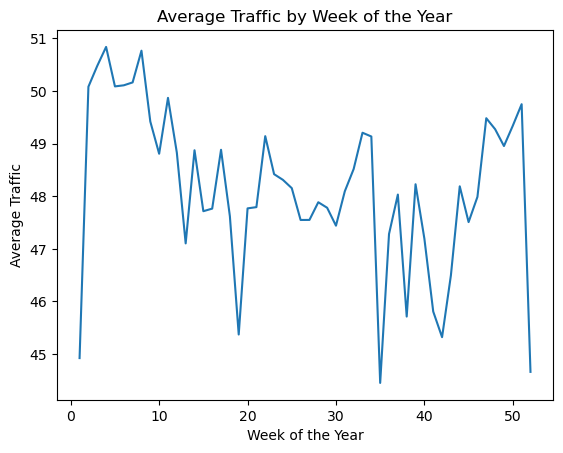

In [65]:
# Convert 'Date' column to datetime format
df_mercado_trends['Date'] = pd.to_datetime(df_mercado_trends['Date'])

# Extract the week of the year from the 'Date' column
df_mercado_trends['week_of_year'] = df_mercado_trends['Date'].dt.isocalendar().week

# Group by the week of the year and calculate average traffic
average_traffic = df_mercado_trends.groupby('week_of_year')['Search Trends'].mean()

# Plot the average traffic by the week of the year
average_traffic.plot(kind='line')
plt.xlabel('Week of the Year')
plt.ylabel('Average Traffic')
plt.title('Average Traffic by Week of the Year')
plt.show()

##### Answer the following question:

**Question:** Are there any time based trends that you can see in the data?

**Answer:** 

In [ ]:
#Not really. Perhaps a dip every tertiary.

## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?


#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [66]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True, 
    infer_datetime_format=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

C:\Users\pyro5\AppData\Local\Temp\ipykernel_14232\880024568.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_stock = pd.read_csv(


,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


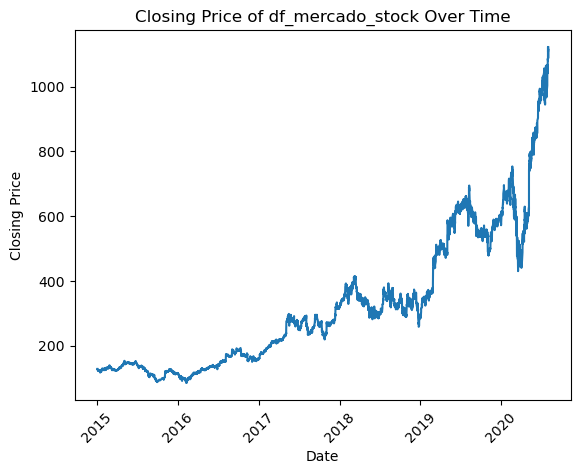

In [67]:
# Visualize the closing price of the df_mercado_stock DataFrame
# Plot the closing price over time
plt.plot(df_mercado_stock.index, df_mercado_stock['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price of df_mercado_stock Over Time')
plt.xticks(rotation=45)
plt.show()

In [68]:
# Concatenate the DataFrames horizontally (along the columns)
df_concatenated = pd.concat([df_mercado_trends, df_mercado_stock], axis=1)

# Drop rows with only one column of data
df_concat_filtered = df_concatenated.dropna(thresh=df_concatenated.shape[1])

# View the first and last five rows of the DataFrame
display(df_concat_filtered.head())
display(df_concat_filtered.tail())


,Search Trends,Date,day_of_week,week_of_year,close
2016-06-01 09:00:00,6.0,2016-06-01 09:00:00,Wednesday,22,135.16
2016-06-01 10:00:00,12.0,2016-06-01 10:00:00,Wednesday,22,136.63
2016-06-01 11:00:00,22.0,2016-06-01 11:00:00,Wednesday,22,136.56
2016-06-01 12:00:00,33.0,2016-06-01 12:00:00,Wednesday,22,136.42
2016-06-01 13:00:00,40.0,2016-06-01 13:00:00,Wednesday,22,136.10


,Search Trends,Date,day_of_week,week_of_year,close
2020-07-31 11:00:00,20.0,2020-07-31 11:00:00,Friday,31,1105.780
2020-07-31 12:00:00,32.0,2020-07-31 12:00:00,Friday,31,1087.925
2020-07-31 13:00:00,41.0,2020-07-31 13:00:00,Friday,31,1095.800
2020-07-31 14:00:00,47.0,2020-07-31 14:00:00,Friday,31,1110.650
2020-07-31 15:00:00,53.0,2020-07-31 15:00:00,Friday,31,1122.510


#### Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

In [69]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
# Convert 'Date' column to datetime format (if not already)
df_concat_filtered.loc[:, 'Date'] = pd.to_datetime(df_concat_filtered['Date'])

# Slice the DataFrame to include only the first half of 2020
df_sliced = df_concat_filtered['2020-01':'2020-06']

# View the sliced DataFrame
display(df_sliced.head())
display(df_sliced.tail())

# View the first and last five rows of first_half_2020 DataFrame


,Search Trends,Date,day_of_week,week_of_year,close
2020-01-02 09:00:00,9.0,2020-01-02 09:00:00,Thursday,1,601.085
2020-01-02 10:00:00,14.0,2020-01-02 10:00:00,Thursday,1,601.290
2020-01-02 11:00:00,25.0,2020-01-02 11:00:00,Thursday,1,615.410
2020-01-02 12:00:00,37.0,2020-01-02 12:00:00,Thursday,1,611.400
2020-01-02 13:00:00,50.0,2020-01-02 13:00:00,Thursday,1,611.830


,Search Trends,Date,day_of_week,week_of_year,close
2020-06-30 11:00:00,17.0,2020-06-30 11:00:00,Tuesday,27,976.17
2020-06-30 12:00:00,27.0,2020-06-30 12:00:00,Tuesday,27,977.50
2020-06-30 13:00:00,37.0,2020-06-30 13:00:00,Tuesday,27,973.23
2020-06-30 14:00:00,45.0,2020-06-30 14:00:00,Tuesday,27,976.50
2020-06-30 15:00:00,51.0,2020-06-30 15:00:00,Tuesday,27,984.93


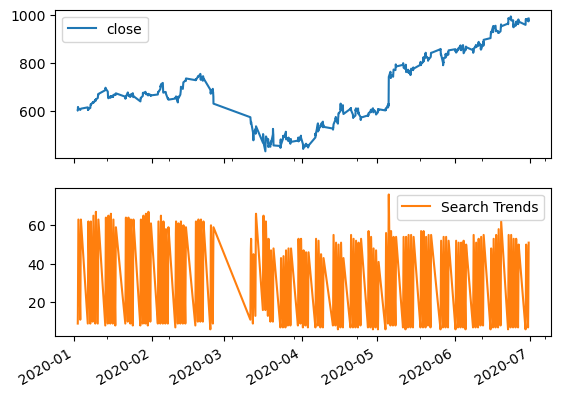

In [70]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
df_sliced_filtered = df_sliced[['close', 'Search Trends']]
df_sliced_filtered.plot(subplots=True)

plt.show()


##### Answer the following question:

**Question:** Do both time series indicate a common trend that’s consistent with this narrative?

**Answer:** In truth, our evidence of a common trend between search activity and stock price is pretty limited. It does appear generally however that the low point for Mercado Libre's stock price, late March to early April, did coincide with lower search activity for the firm. Search activity does pick up along with its stock price, although the stock price from mid-April onward definitively outpaces search interest.

There's one important thing to note: if you zoom in both graphs to the spike around May 5th, 2020, you'll find the date of the company's earnings release to the public. It looks like search traffic for the firm spiked about two hours before the firm's stock price spiked. This could indicate a predictable pattern (can Google Searches predict the stock price?), but an alternative explanation might just be that people tend to search for more information about the firm right before an earnings announcement gets released. We'd need to do a little more time-series research to see which explanation best fits the data.

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [71]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
df_concat_filtered.loc[:, 'Lagged Search Trends'] = df_concat_filtered['Search Trends'].shift(1)


C:\Users\pyro5\AppData\Local\Temp\ipykernel_14232\646449105.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_filtered.loc[:, 'Lagged Search Trends'] = df_concat_filtered['Search Trends'].shift(1)


In [72]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_concat_filtered.loc[:, 'Stock Volatility'] = df_concat_filtered['close'].pct_change().rolling(window=4).std()

df_concat_filtered


C:\Users\pyro5\AppData\Local\Temp\ipykernel_14232\3466821575.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_filtered.loc[:, 'Stock Volatility'] = df_concat_filtered['close'].pct_change().rolling(window=4).std()


,Search Trends,Date,day_of_week,week_of_year,close,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00,6.0,2016-06-01 09:00:00,Wednesday,22,135.160,NaN,NaN
2016-06-01 10:00:00,12.0,2016-06-01 10:00:00,Wednesday,22,136.630,6.0,NaN
2016-06-01 11:00:00,22.0,2016-06-01 11:00:00,Wednesday,22,136.560,12.0,NaN
2016-06-01 12:00:00,33.0,2016-06-01 12:00:00,Wednesday,22,136.420,22.0,NaN
2016-06-01 13:00:00,40.0,2016-06-01 13:00:00,Wednesday,22,136.100,33.0,0.006134
...,...,...,...,...,...,...,...
2020-07-31 11:00:00,20.0,2020-07-31 11:00:00,Friday,31,1105.780,11.0,0.012837
2020-07-31 12:00:00,32.0,2020-07-31 12:00:00,Friday,31,1087.925,20.0,0.013549
2020-07-31 13:00:00,41.0,2020-07-31 13:00:00,Friday,31,1095.800,32.0,0.013295
2020-07-31 14:00:00,47.0,2020-07-31 14:00:00,Friday,31,1110.650,41.0,0.013001


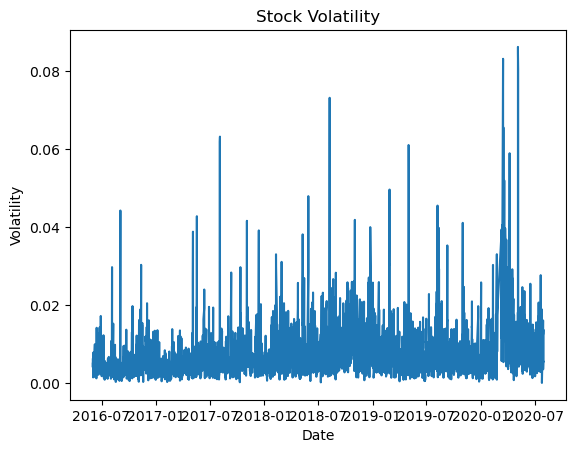

In [73]:
# Visualize the stock volatility
# Plot the stock volatility
plt.plot(df_concat_filtered['Stock Volatility'])
plt.title('Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()


**Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [74]:
# Create a new column in the df_concat_filtered DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
df_concat_filtered.loc[:, 'Hourly Stock Return'] = df_concat_filtered['close'].pct_change() * 100


C:\Users\pyro5\AppData\Local\Temp\ipykernel_14232\2978161262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat_filtered.loc[:, 'Hourly Stock Return'] = df_concat_filtered['close'].pct_change() * 100


In [75]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
display(df_concat_filtered.head())
display(df_concat_filtered.tail())

,Search Trends,Date,day_of_week,week_of_year,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00,6.0,2016-06-01 09:00:00,Wednesday,22,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,2016-06-01 10:00:00,Wednesday,22,136.63,6.0,NaN,1.087600
2016-06-01 11:00:00,22.0,2016-06-01 11:00:00,Wednesday,22,136.56,12.0,NaN,-0.051233
2016-06-01 12:00:00,33.0,2016-06-01 12:00:00,Wednesday,22,136.42,22.0,NaN,-0.102519
2016-06-01 13:00:00,40.0,2016-06-01 13:00:00,Wednesday,22,136.10,33.0,0.006134,-0.234570


,Search Trends,Date,day_of_week,week_of_year,close,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,20.0,2020-07-31 11:00:00,Friday,31,1105.780,11.0,0.012837,0.637986
2020-07-31 12:00:00,32.0,2020-07-31 12:00:00,Friday,31,1087.925,20.0,0.013549,-1.614697
2020-07-31 13:00:00,41.0,2020-07-31 13:00:00,Friday,31,1095.800,32.0,0.013295,0.723855
2020-07-31 14:00:00,47.0,2020-07-31 14:00:00,Friday,31,1110.650,41.0,0.013001,1.355174
2020-07-31 15:00:00,53.0,2020-07-31 15:00:00,Friday,31,1122.510,47.0,0.013566,1.067843


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [76]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
correlation_table = df_concat_filtered[['Stock Volatility', 'Search Trends', 'Hourly Stock Return']].corr()
display(correlation_table)

,Stock Volatility,Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.172826,0.061424
Search Trends,-0.172826,1.000000,-0.029899
Hourly Stock Return,0.061424,-0.029899,1.000000


##### Answer the following question:


**Question:** Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

**Answer:** If we read down the second column (or read along the second row), we see that there's a slight negative correlation between searches for the firm and its subsequent stock volatility. More searches (slightly) tend to indicate less near-term hourly stock risk for the firm.

On the other hand, there's a positive correlation between search activity in one hour and stock returns in the next: as search activity goes up, so will the firm's stock price in the short term. This effect is very weak though, only half the size of the effect on stock volatility. With the correlation so close to zero, some might also say that there's almost no relationship between these two variables whatsoever, and that the small findings that we do have could be just due to chance. While there's no required threshold when looking at correlation between stock returns and the variables used to predict them, it does tend to be that correlations in this context tend to be very low across the board. It's hard to predict the market!

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


#### Step 1: Set up the Google search data for a Prophet forecasting model.

In [78]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends2 = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date', 
    parse_dates=['Date'], 
    infer_datetime_format=True
).dropna()





C:\Users\pyro5\AppData\Local\Temp\ipykernel_14232\1994500942.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_mercado_trends2 = pd.read_csv(
C:\Users\pyro5\AppData\Local\Temp\ipykernel_14232\1994500942.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends2 = pd.read_csv(


In [40]:
df_mercado_trends2


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96


In [41]:
df_mercado_trends3= df_mercado_trends2
df_mercado_trends3.reset_index(inplace=True)
df_mercado_trends3.rename(columns={'index': 'ds', 'Search Trends': 'y'}, inplace=True)
df_mercado_trends3.set_index('Date', inplace=True)


df_mercado_trends3.reset_index(inplace=True)
df_mercado_trends3.rename(columns={'index': 'new_column_name'}, inplace=True)

df_mercado_trends3.rename(columns={'Date': 'ds'}, inplace=True)
df_mercado_trends3






,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38
...,...,...
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97


In [79]:
# Call the Prophet function, store as an object
from prophet import Prophet
model = Prophet()

In [80]:
# Fit the time-series model.
model.fit(df_mercado_trends3)


18:11:24 - cmdstanpy - INFO - Chain [1] start processing
18:11:58 - cmdstanpy - INFO - Chain [1] done processing


In [90]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)

# Create a future dataframe with 2000 hours (80 days) of periods
future_df = model.make_future_dataframe(periods=2000, freq='H')

# Create an instance of the Prophet class
model = Prophet()

# Fit the model
model.fit(df_mercado_trends3)

# Make predictions for the future dataframe
predictions = model.predict(future_df)

# View the last five rows of the future_df DataFrame
future_df.tail()


18:17:27 - cmdstanpy - INFO - Chain [1] start processing
18:18:02 - cmdstanpy - INFO - Chain [1] done processing


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [91]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
Trend_data_forecast = model.predict(future_df)

# Display the first five rows of the Trend_data_forecast DataFrame
Trend_data_forecast.head()



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,81.517231,98.372033,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,78.251549,94.701071,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,68.385323,83.886840,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,52.130052,68.885733,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,34.658593,51.395189,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

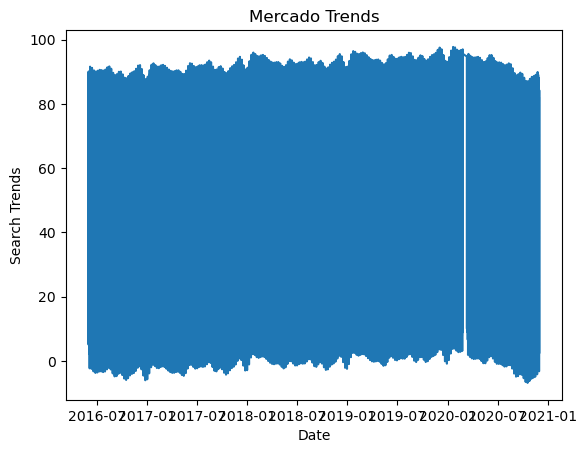

In [83]:
# Plot the Prophet predictions for the Mercado trends data
plt.plot(predictions['ds'], predictions['yhat'])
plt.title('Mercado Trends')
plt.xlabel('Date')
plt.ylabel('Search Trends')
plt.show()


##### Answer the following question:

**Question:**  How's the near-term forecast for the popularity of MercadoLibre?

**Answer:** 


The near-term forecast is negative, suggesting it may have been at a peak when the data ended.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [84]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
Trend_data_forecast.set_index('ds', inplace=True)

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
selected_columns = Trend_data_forecast[['yhat', 'yhat_lower', 'yhat_upper']]
selected_columns


,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.659992,80.934844,98.671366
2016-06-01 01:00:00,86.106654,77.973162,94.760386
2016-06-01 02:00:00,75.784037,67.124380,84.124004
2016-06-01 03:00:00,60.517701,51.957114,69.181298
2016-06-01 04:00:00,43.403713,34.525609,52.323060
...,...,...,...
2020-11-30 04:00:00,39.507473,30.456574,47.909140
2020-11-30 05:00:00,24.036286,15.701115,32.280173
2020-11-30 06:00:00,12.070566,3.363681,19.775711


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

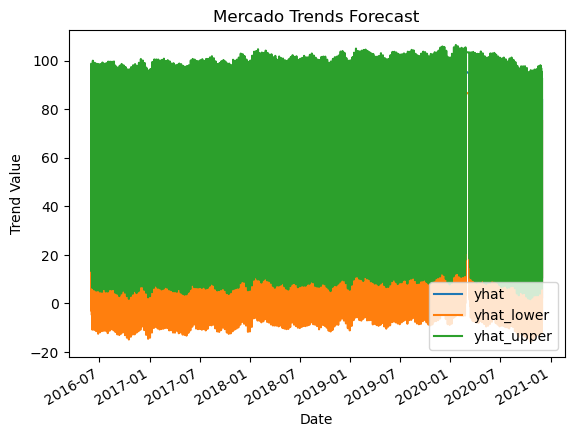

In [85]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
Trend_data_forecast[['yhat', 'yhat_lower', 'yhat_upper']].plot()
plt.title('Mercado Trends Forecast')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.show()

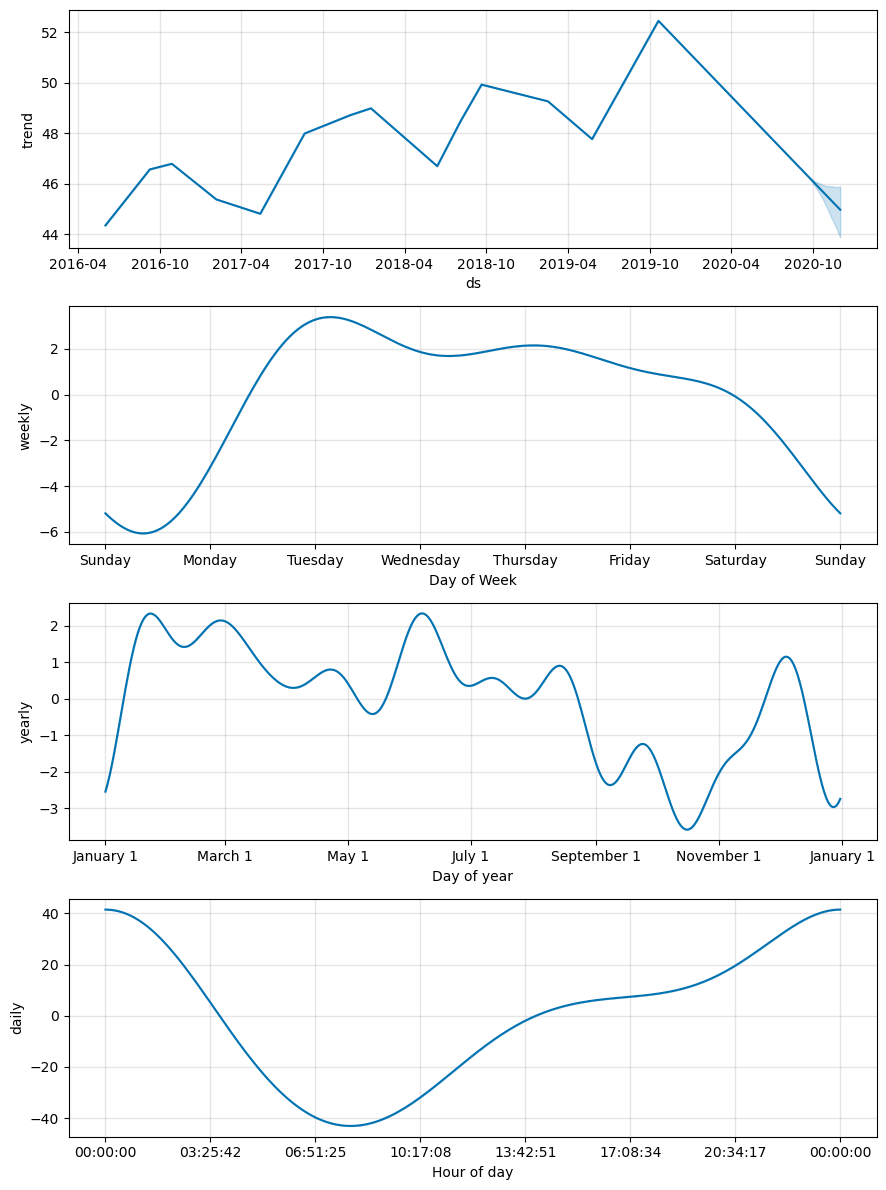

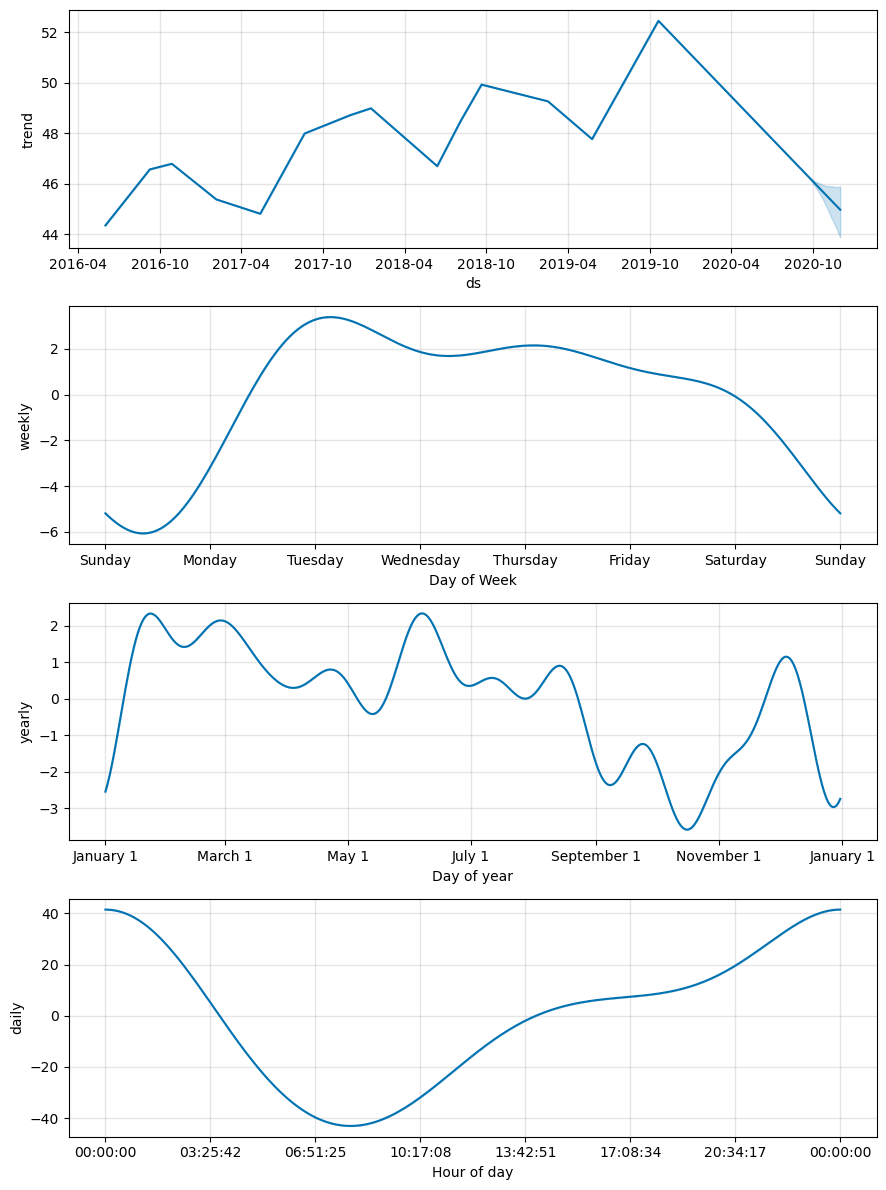

In [95]:
# Reset the index in the forecast_mercado_trends DataFrame
#Trend_data_forecast= Trend_data_forecast.reset_index()
model.plot_components(Trend_data_forecast)


##### Answer the following questions:

**Question:** What time of day exhibits the greatest popularity?

**Answer:** 

**Question:** Which day of week gets the most search traffic? 
   
**Answer:** 

**Question:** What's the lowest point for search traffic in the calendar year?

**Answer:** 


What time of day exhibits the greatest popularity?
    Midnight    
Which day of week gets the most search traffic?
    Tuesday
What's the lowest point for search traffic in the caleandar year?
    Mid October